In [2]:
import networkx as nx

from OperatorBenchmark import OperatorBenchmark

from typing import List, Dict

from scripts import load_profiling_data,create_profiling_data_ER,separate_keys_and_values,git_branch_commit_push,create_profiling_data_ER_HPC
from datetime import datetime

import os
import re

from utils.plotTools import plot_qwak


Profiling applied to init_operator, config: {'output_path': 'operator_results', 'output_file': None, 'tracked_attributes': ['n', 'sample', 'pVal', 'seed']}
Profiling applied to build_operator, config: {'output_path': 'operator_results', 'output_file': None, 'tracked_attributes': ['n', 'sample', 'pVal', 'seed']}
Profiling applied to build_expm_operator, config: {'output_path': 'operator_results_hpc', 'output_file': None, 'tracked_attributes': ['n', 'sample', 'pVal', 'seed']}
Profiling applied to init_operator, config: {'output_path': 'operator_results_hpc', 'output_file': None, 'tracked_attributes': ['n', 'sample', 'pVal', 'seed']}
Profiling applied to build_operator, config: {'output_path': 'operator_results_hpc', 'output_file': None, 'tracked_attributes': ['n', 'sample', 'pVal', 'seed']}
Profiling applied to build_expm_operator, config: {'output_path': 'operator_results_hpc', 'output_file': None, 'tracked_attributes': ['n', 'sample', 'pVal', 'seed']}
Profiling applied to init_hiperwal

In [3]:
nMin = 3
nMax = 1000
n_values = list(range(nMin, nMax, 1))
pVal = 0.8
seed = 10
sample_range = range(0,100)

Processing n-values: 100%|██████████| 997/997 [00:41<00:00, 23.74it/s]


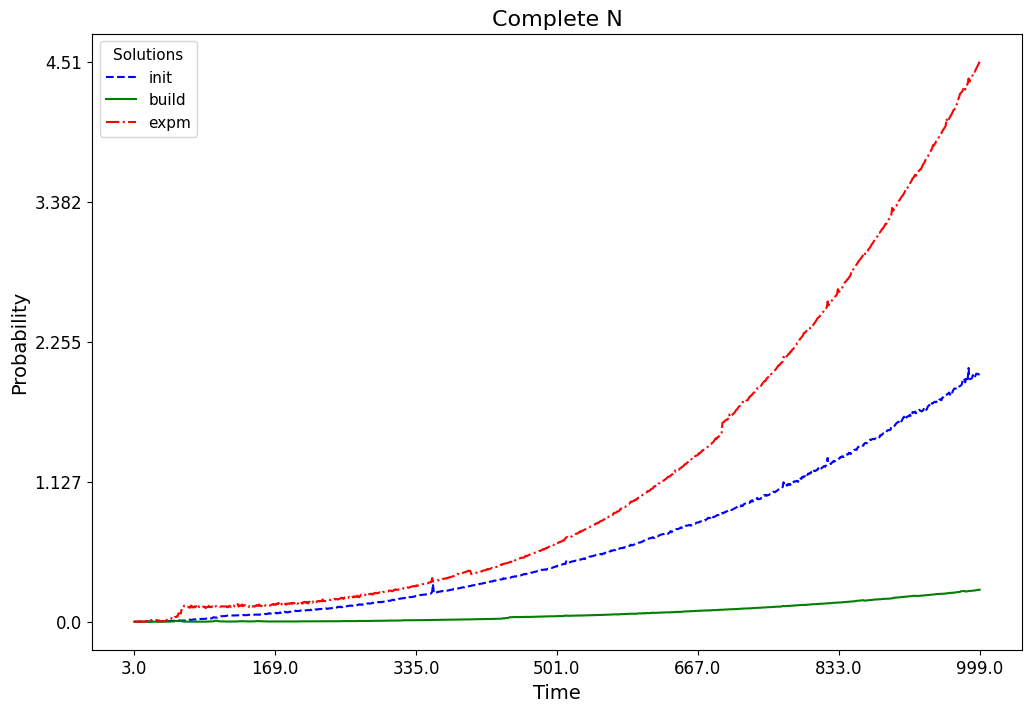

In [4]:
SCRIPT_DIR =SCRIPT_DIR = os.getcwd()
path = os.path.normpath(os.path.join(
    SCRIPT_DIR,
    "Profiling/operator_results"
))
# Verify path exists
if not os.path.exists(path):
    print(f"ERROR: Path not found - {path}")
    print("Current directory contents:", os.listdir(SCRIPT_DIR))
    exit()
# Now load data
result = load_profiling_data(
    path=path,
    method_name="init_operator",
    nrange=n_values,
    sample_range=sample_range,  # Assuming samples 0-9
    pVal=pVal,
    seed=seed
)
result2 = load_profiling_data(
    path=path,
    method_name="build_operator",
    nrange=n_values,
    sample_range=sample_range,  # Assuming samples 0-9
    pVal=pVal,
    seed=seed
)

result3 = load_profiling_data(
    path=path,
    method_name="build_expm_operator",
    nrange=n_values,
    sample_range=sample_range,  # Assuming samples 0-9
    pVal=pVal,
    seed=seed
)

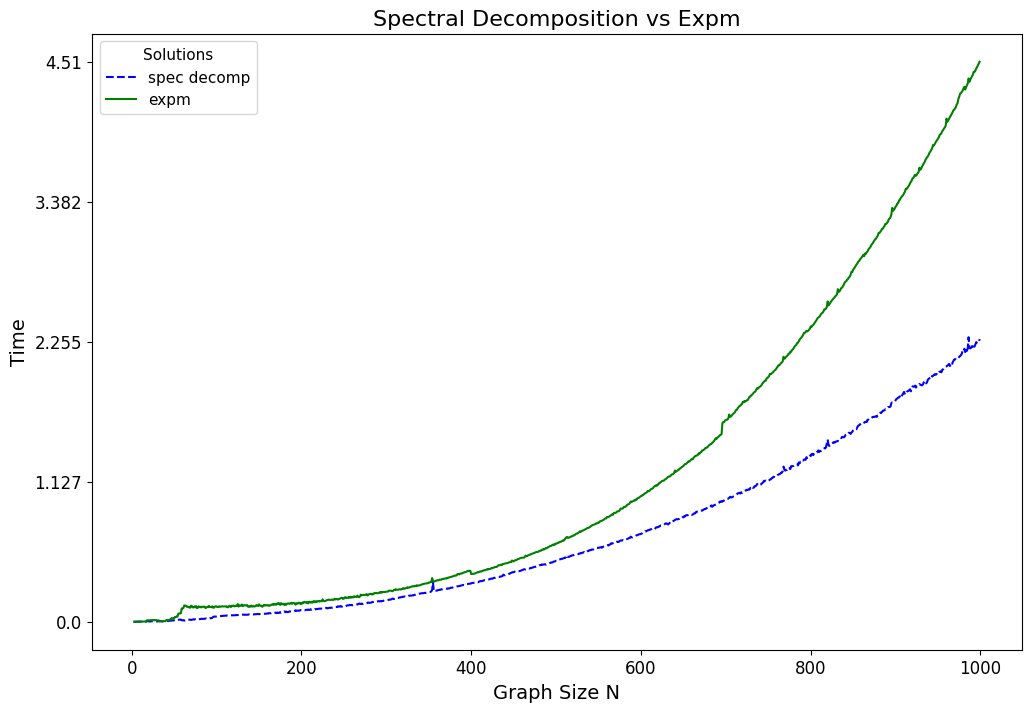

In [13]:
def merge_by_sum(dict_a, dict_b):
    """
    Merge two dictionaries by summing the values of matching keys.
    Assumes both dictionaries have the same keys.
    """
    merged = {}
    for key in dict_a:
        merged[key] = dict_a[key] + dict_b[key]
    return merged


params = {
    'figsize': (12, 8),
    'plot_title' : f'Spectral Decomposition vs Expm',
    'x_label' : 'Graph Size N',
    'y_label' : "Time",
    'legend_labels' : ['spec decomp','expm'],
    'legend_loc': "best",
    'legend_title' : 'Solutions',
    'legend_ncol' : 1,
    # 'color_list' : ['#0000FF', '#008000', '#525252'],
    'color_list' : ['b','g','r'],
    'line_style_list' : ['--', '-','-.' ],
    # 'save_path' : f'Output/CompleteSearch/completePlot_N{N}_NWALKS{numberOfWalks}_S{samples}.png',
    'use_loglog': False,
    'use_cbar' : False,
    'cbar_label' : None, 
    'cbar_ticks' : None,
    'cbar_tick_labels' : None,
    'x_lim' : None,
    # 'x_num_ticks' : 10,
    'y_num_ticks' : 5,
    'x_round_val' : 2,
    'y_round_val' : 3,
    # 'v_line_values' : v_line_values,
    # # 'v_line_style': '--',
    'title_font_size': 20,
    'xlabel_font_size': 22,
    'ylabel_font_size': 22,
    'legend_font_size': 14,
    'legend_title_font_size': 14,
    'tick_font_size': 18,}

merged_result = merge_by_sum(result, result2)
result_keys, result_values = separate_keys_and_values(merged_result)
# result_keys, result_values = separate_keys_and_values(result)
# result2_keys, result2_values = separate_keys_and_values(result2)
result3_keys, result3_values = separate_keys_and_values(result3)



x_value_matrix = [result_keys,result3_keys]
y_value_matrix = [result_values,result3_values]

plot_qwak(x_value_matrix = x_value_matrix, y_value_matrix = y_value_matrix,**params)